In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
classnames = ['Tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(trainimages, trainlabel), (testimages, testlabel) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
def showImage(index):
  imglabel = str(trainlabel[index])+'('+classnames[trainlabel[index]] + ")"
  plt.figure()
  plt.title('Image label ' + imglabel)
  plt.imshow(trainimages[index], cmap='gray')
  plt.colorbar()
  plt.show()

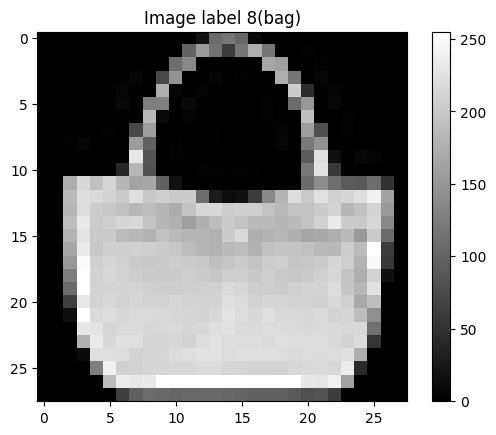

In [6]:
showImage(100)

In [7]:
#normalization

trainimages = trainimages / 255.0
testimages = testimages / 255.0

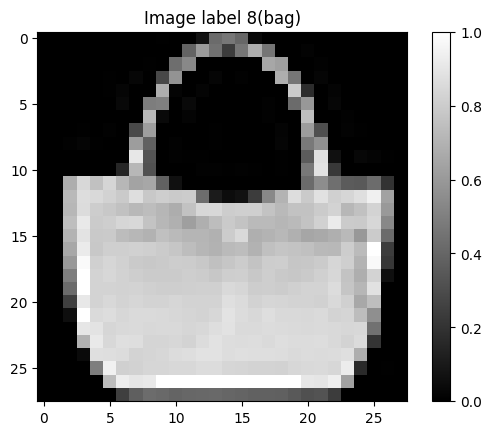

In [8]:
showImage(100)

In [9]:
model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.add(tf.keras.layers.Dense(128, activation='relu'))

In [12]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
training_hist = model.fit(trainimages, trainlabel, epochs=40)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7867 - loss: 0.6123
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8626 - loss: 0.3809
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8755 - loss: 0.3377
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8836 - loss: 0.3156
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8912 - loss: 0.2906
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8981 - loss: 0.2785
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9005 - loss: 0.2648
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9042 - loss: 0.2548
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9088 - loss: 0.2429
Epoch 10/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9131 - loss: 0.2345
Epoch 11/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9142 - loss: 0.2258
Epoch 12/40
1875/1875 ━━━━

In [15]:
def plot_acc(hist):
  plt.title('Accuracy History')
  plt.plot(hist.history['accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.show()

def plot_loss(hist):
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()

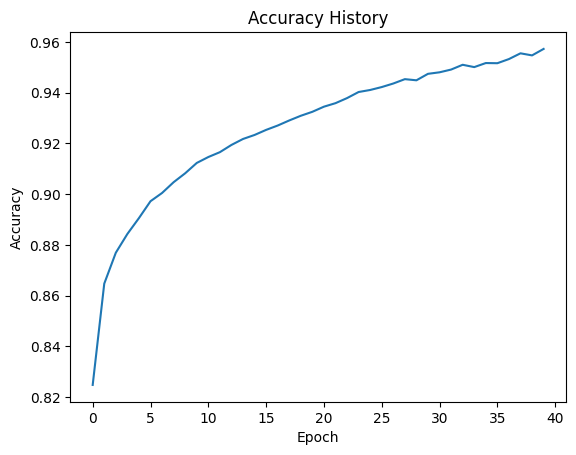

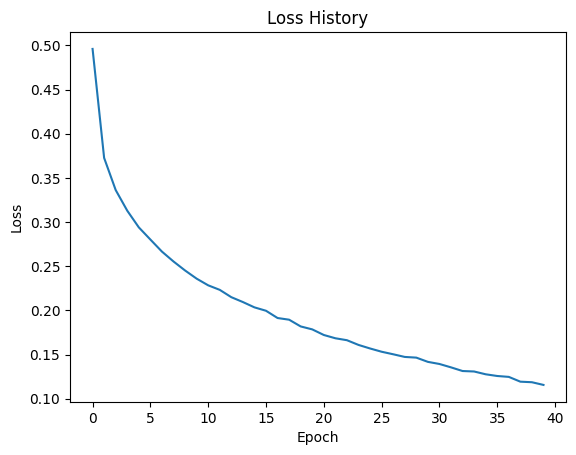

In [16]:
plot_acc(training_hist)
plot_loss(training_hist)

In [17]:
test_loss, tes_acc = model.evaluate(testimages, testlabel)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8881 - loss: 0.4694


In [ ]:
# Less layers to see it solves overfitting and using validation data with training

In [18]:
model1  = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model1.add(tf.keras.layers.Dense(32, activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model1.fit(trainimages, trainlabel, epochs=40, validation_data=(testimages, testlabel))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7571 - loss: 0.7315 - val_accuracy: 0.8411 - val_loss: 0.4556
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8552 - loss: 0.4173 - val_accuracy: 0.8499 - val_loss: 0.4351
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8658 - loss: 0.3787 - val_accuracy: 0.8575 - val_loss: 0.4036
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8707 - loss: 0.3581 - val_accuracy: 0.8613 - val_loss: 0.3905
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8805 - loss: 0.3313 - val_accuracy: 0.8597 - val_loss: 0.3943
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8831 - loss: 0.3218 - val_accuracy: 0.8639 - val_loss: 0.3807
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8861 - loss: 0.3143 - val_accuracy: 0.8734 - val_loss: 0.3631
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8889 - loss: 0.3045 -

In [21]:
# Use dropout neurons, drop 20% of hidden layer neurons

In [23]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model2.fit(trainimages, trainlabel, epochs=40, validation_data=(testimages, testlabel))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7407 - loss: 0.7399 - val_accuracy: 0.8417 - val_loss: 0.4452
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8436 - loss: 0.4407 - val_accuracy: 0.8533 - val_loss: 0.4038
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8575 - loss: 0.3959 - val_accuracy: 0.8594 - val_loss: 0.3945
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8647 - loss: 0.3735 - val_accuracy: 0.8655 - val_loss: 0.3705
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8717 - loss: 0.3539 - val_accuracy: 0.8569 - val_loss: 0.3892
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8755 - loss: 0.3402 - val_accuracy: 0.8667 - val_loss: 0.3691
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8776 - loss: 0.3321 - val_accuracy: 0.8708 - val_loss: 0.3612
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8805 - loss: 0.3247 

In [ ]:
# stopping early using callback, be patient for 4 epochs and if validation loss remain same or increase, stop training

In [26]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model3.add(tf.keras.layers.Dense(64, activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
stopping_early_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
model3.fit(trainimages, trainlabel, epochs=40, validation_data=(testimages, testlabel), callbacks=[stopping_early_cb])

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7725 - loss: 0.6588 - val_accuracy: 0.8448 - val_loss: 0.4415
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8561 - loss: 0.4071 - val_accuracy: 0.8523 - val_loss: 0.4070
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8672 - loss: 0.3621 - val_accuracy: 0.8524 - val_loss: 0.4122
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8751 - loss: 0.3400 - val_accuracy: 0.8640 - val_loss: 0.3819
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8853 - loss: 0.3111 - val_accuracy: 0.8650 - val_loss: 0.3742
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8909 - loss: 0.2966 - val_accuracy: 0.8690 - val_loss: 0.3782
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8935 - loss: 0.2879 - val_accuracy: 0.8768 - val_loss: 0.3493
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8987 - loss: 0.275

In [ ]:
#save model

In [29]:
import os
cur = os.getcwd()
path = os.path.join(cur, 'models')
tf.saved_model.save(model3, path)